

---


**Implementation linear regression with L1 regularization without using library**

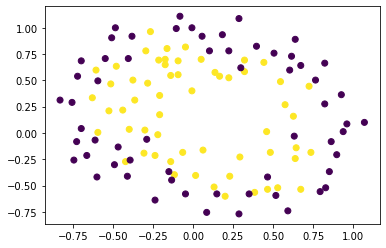

In [17]:
#importiang libs and data
import pandas as pd
import matplotlib.pyplot as plt
import random 
import math
import numpy as np
df=pd.read_csv("Quality.csv",header=None) 
features=list(df.columns)[:-1]
labels=list(df.columns)[-1]
plt.scatter(df[0],df[1],c=df[labels])

In [4]:
#data for adding polynomial_features
def polynomial_features(df1,degree):
  for i in range(degree):
    temp=df1[0]**(i+2)
    df1[len(df1.columns)]=temp
    for j in range(i+2):
      temp=temp*df[1]/df1[0]
      df1[len(df1.columns)]=temp
  return df1

In [5]:
#Handling nan data
df.dropna(thresh=len(features))
for i in features:
  df[i] = df[i]. fillna(df[i]. mean())

In [6]:
df1 = df.iloc[:, 0:2]
df2=polynomial_features(df1,5)
tags=df.iloc[:, 2].values
data=df2.values

In [7]:
#Train Test Split
def test_train_split(data,tags,percent):
  shuffler = np.random.permutation(len(data))
  data_shuffled = data[shuffler]
  tags_shuffled = tags[shuffler]
  x_train=data_shuffled[:int(len(data)*percent)]
  y_train=tags_shuffled[:int(len(data)*percent)]
  x_test=data_shuffled[int(len(data)*percent)+1:]
  y_test=tags_shuffled[int(len(data)*percent)+1:]
  return x_train,y_train,x_test,y_test
x_train,y_train,x_test,y_test=test_train_split(data,tags,0.7)

In [8]:
def sigmoid(x):
     return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
     return x * (1 - x)

class logigisitcRegression():
  def __init__(self,data,tags):
    self.n_samples,self.n_features=data.shape
    self.n_classes=np.unique(tags)
    self.X=data
    self.train_data=[]
    self.train_tags=np.reshape(tags, (self.n_samples, 1))
    self.trained_parameters=[]
  def fit(self,iter,lr,la):
    cost_values=[]
    cost_values = []
    weights=np.random.rand(self.n_features,1)
    bias=0
    for _ in range(iter):
      z = np.dot(self.X,weights) + bias 
      hypothesis = sigmoid(z) 
      j = 1/self.n_samples*(-1*(np.sum(self.train_tags*np.log(hypothesis) + (1-self.train_tags)*np.log(1-hypothesis)))+la*np.sum(np.square(weights)))
      dw =  1/self.n_samples * (np.dot(self.X.T,hypothesis-self.train_tags)+la*weights)
      db =  1/self.n_samples * np.sum(hypothesis-self.train_tags)
      weights = weights - lr*dw
      bias = bias - lr*db
    cost_values=j  
    self.trained_parameters=[weights,bias]
    return cost_values,self.trained_parameters
  def score(self,X,Y):
    k=0
    for i in range(len(X)):
      z=np.reshape(X[i], (X[i].shape[0], 1))
      pred=self.predict(z)
      if(pred==Y[i]):
        k=k+1
    return k/len(X)
  def predict(self,x_test):
    if(x_test.shape[1]==1):
      y_pre=[]
      z = np.dot(x_test.T,self.trained_parameters[0]) + self.trained_parameters[1] 
      hypothesis = sigmoid(z)
      if(hypothesis>0.5):
        return 1
      else:
        return 0
    else:
      y_pre=[]
      for i in range(len(x_test)):
        z = np.dot(x_test[i],self.trained_parameters[0]) + self.trained_parameters[1] 
        hypothesis = sigmoid(z)
        if(hypothesis>0.5):
          y_pre.append(1)
        else:
          y_pre.append(0)
      return y_pre
  
lrclassifier=logigisitcRegression(x_train,y_train)    
Wb,d=lrclassifier.fit(10000,0.01,0.2)

In [9]:
print("Accuracy for the train data is:", lrclassifier.score(x_test,y_test))
print("Accuracy for the test data is:", lrclassifier.score(x_train,y_train))


Accuracy for the train data is: 0.8285714285714286
Accuracy for the test data is: 0.8170731707317073


In [13]:
#implementing the polyfeatuers function for arrays
def polyf(x1,x2,degree):
  M=np.c_[x1,x2]
  for i in range(degree):
    temp=x1**(i+2)
    M=np.c_[M,temp]
    for j in range(i+2):
      temp=(temp*x2)/x1
      M=np.c_[M,temp]
  return M

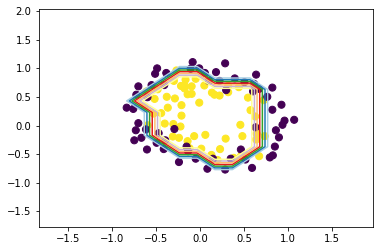

In [12]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Quality.csv",header=None) 
features=list(df.columns)[:-1]
labels=list(df.columns)[-1]
df.dropna(thresh=len(features))
for i in features:
  df[i] = df[i].fillna(df[i].mean())
h=0.2
tags=df[labels].values
tags=np.array(tags,dtype=int)
data=df[df.columns.drop(labels)].values
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = np.array(lrclassifier.predict(polyf(xx.ravel(),yy.ravel(),5)))
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(df[0], df[1], c=df[labels], s=50)

---
**Implementation linear regression with L1 regularization using Sklearn**






In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
df=pd.read_csv("Quality.csv",header=None) 
features=list(df.columns)[:-1]
labels=list(df.columns)[-1]
df.dropna(thresh=len(features))
for i in features:
  df[i] = df[i].fillna(df[i].mean())
tags=df[labels].values
tags=np.array(tags,dtype=int)
data=df[df.columns.drop(labels)].values
poly = PolynomialFeatures(degree=6)
data=poly.fit_transform(data)
X_train, X_test, y_train, y_test = train_test_split(data, tags, test_size=0.3)
clf = LogisticRegression(penalty='l2')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [15]:
print("Accuracy for the train data is:", clf.score(X_train, y_train))
print("Accuracy for the test data is:", clf.score(X_test, y_pred))

Accuracy for the train data is: 0.8292682926829268
Accuracy for the test data is: 1.0


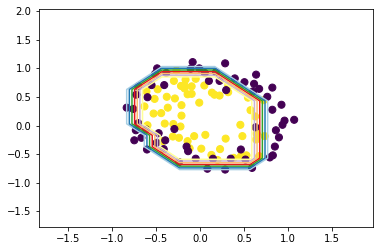

In [16]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Quality.csv",header=None) 
features=list(df.columns)[:-1]
labels=list(df.columns)[-1]
df.dropna(thresh=len(features))
for i in features:
  df[i] = df[i].fillna(df[i].mean())
h=0.2
tags=df[labels].values
tags=np.array(tags,dtype=int)
data=df[df.columns.drop(labels)].values
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

poly = PolynomialFeatures(degree=6)
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict(poly.fit_transform(np.c_[xx.ravel(), yy.ravel()]))
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(df[0], df[1], c=df[labels], s=50)